tensorflow를 이용하여 multi varible binary class logistic regression 문제를 풀어봅니다.

(200, 3)
(200, 1)


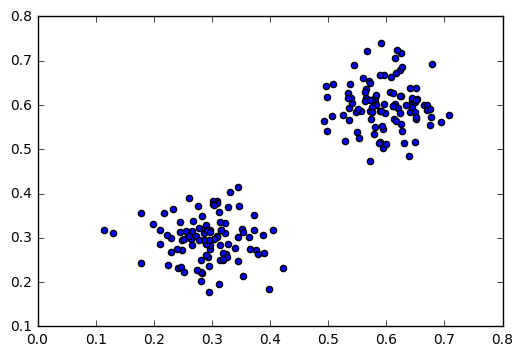

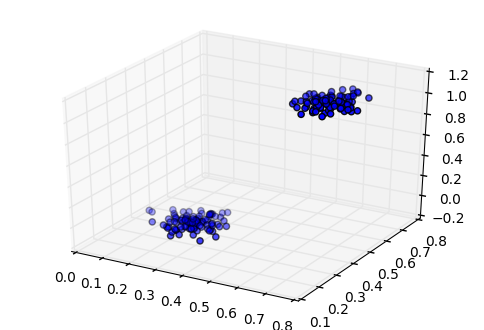

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# x 변수가 2개이고, y 가 2개의 클래스(0 or 1)를 가지는 데이터를 생성합니다.
# 행렬 곱만으로 y를 계산하기 위해 x_data의 첫번째 row를 1.0 으로 셋팅합니다.
x_0 = np.ones([200, 1])
x_1a = np.random.normal(0.3, 0.05, (100, 1))
x_1b = np.random.normal(0.6, 0.05, (100, 1))
x_1 = np.concatenate((x_1a, x_1b), axis = 0)
x_2a = np.random.normal(0.3, 0.05, (100, 1))
x_2b = np.random.normal(0.6, 0.05, (100, 1))
x_2 = np.concatenate((x_2a, x_2b), axis = 0)
x_data = np.concatenate((x_0, x_1, x_2), axis = 1)
x_data = np.float32(x_data)

y_data = np.zeros([200, 1])
y_data[0:100, 0] = 0
y_data[100:200, 0] = 1
y_data = np.float32(y_data)

print x_data.shape
print y_data.shape

# x_data를 출력해 class 를 2개 클러스터를 가지고 있음을 확인해봅니다.
plt.scatter(x_data[:, 1], x_data[:, 2], label="2d")
plt.show()

# 3차원 그래프로 y_data 까지 확인해봅니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data[:, 1], x_data[:, 2], y_data, label="3d")
plt.show()

In [2]:
import tensorflow as tf

In [3]:
# 행렬 곱으로 y 값을 계산하기 위해 
# x_data 가 200x3 행렬이므로 Weight를 3x1 행렬로 생성합니다.
# y 값 예측을 위해서 logistic function 인 sigmod 함수를 추가로 적용해 줍니다.
W = tf.Variable(tf.random_uniform([3, 1], -1.0, 1.0))
y = tf.nn.sigmoid(tf.matmul(x_data, W))

In [4]:
# loss 함수의 경우 y 함수(hypothesis)를 convex 형태의 미분 가능한 함수로 만들어줘야 합니다.
# y_data 가 0일 경우 loss 함수는 -tf.log(1 - y) 가 되어 오른쪽 반만 남은 convex 형태가 되고
# y_data 가 1일 경우 loss 함수는 -tf.log(y) 가 되어 왼쪽 반만 남은 convex 형태가 되어
# 전체적으로 convex 형태를 이루고 미분 가능하기때문에 Gradienct Descent 방법을 이용하여 최적화가 가능하게 됩니다.
loss = -tf.reduce_mean(y_data * tf.log(y) + (1. - y_data) * tf.log(1. - y))
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

step: 0, loss: 0.730104
step: 10000, loss: 0.287848
step: 20000, loss: 0.174234
training_accuracy: 1.0
Weight: [[-6.19511223]
 [ 7.38408327]
 [ 6.70365667]]


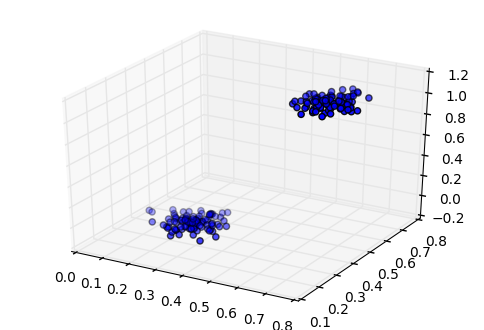

In [5]:
# 세션을 열고 각 훈련마다 loss 함수 값을 출력해 얼마나 loss 값이 출어드는지 확인합니다.
# 훈련한 데이터에 대한 정확도가 얼마나 되는지 계산해 봅니다.
# 그래프를 통해서도 훈련 데이터와의 분포가 얼마나 비슷한 지 볼 수 있습니다.
from mpl_toolkits.mplot3d import Axes3D

with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    
    for step in xrange(30000):
        sess.run(train)
        if step % 10000 == 0:
            print "step: %d, loss: %f" % (step, sess.run(loss))
    
    predict_y = sess.run(y)
    for y in np.nditer(predict_y, op_flags=['readwrite']):
        if y > 0.5:
            y[...] = 1.0
        else:
            y[...] = 0.0

    training_accuracy = (200 - np.sum(np.square(predict_y - y_data)))/200
    print "training_accuracy: %s" % training_accuracy
    print "Weight: %s" % sess.run(W)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_data[:, 1], x_data[:, 2], predict_y)
    plt.show()
